In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%run -i helper_functions.py

## Load cleaned data set

In [3]:
df = pd.read_csv('./output/cleaned_loan_data.csv', low_memory=False)
df.shape

(1786867, 28)

## Exploratory Data Analysis

In [4]:
# Print all unique values for each column
print_unique_values(df)

acc_now_delinq: [ 0.  1.  2.  3.  5.  4.  6. 14.]
application_type: ['Individual' 'Joint App']
emp_length: [ 4  2 10  3  5  6  1  7  0  9  8]
grade: ['B' 'A' 'C' 'D' 'E' 'F' 'G']
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']
inq_last_6mths: [1. 2. 0. 3. 4. 5. 6. 7. 8.]
loan_status: ['Fully Paid' 'Non-Performing']
pub_rec_bankruptcies: [ 0.  1.  2.  4.  3.  8.  5.  6.  7. 12.  9. 11.]
purpose: ['debt_consolidation' 'home_improvement' 'other' 'credit_card'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational']
term: [36 60]
verification_status: ['Not Verified' 'Source Verified' 'Verified']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786867 entries, 0 to 1786866
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   acc_now_delinq        float64
 1   addr_state            object 
 2   annual_inc            float64
 3   application_type      object 
 4   avg_cur_bal           float64
 5   bc_util               float64
 6   delinq_2yrs           float64
 7   dti                   float64
 8   emp_length            int64  
 9   emp_title             object 
 10  fico_range_high       float64
 11  fico_range_low        float64
 12  grade                 object 
 13  home_ownership        object 
 14  inq_last_6mths        float64
 15  installment           float64
 16  int_rate              float64
 17  issue_d               object 
 18  loan_amnt             float64
 19  loan_status           object 
 20  pub_rec               float64
 21  pub_rec_bankruptcies  float64
 22  purpose               object 
 23  revol_b

### Loan Volume Amount by State

Number of unique values: 51


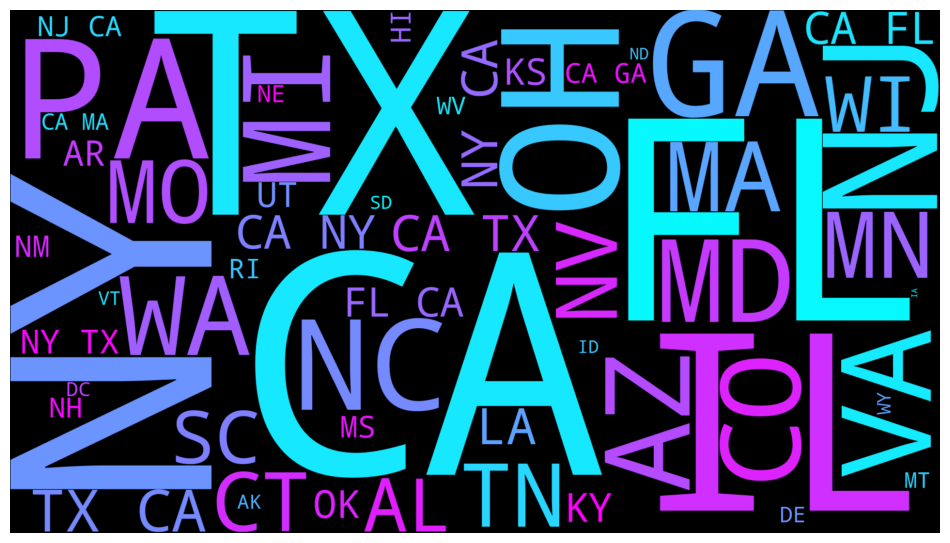

In [6]:
create_wordcloud(df['addr_state'])

In [7]:
# Total 'loan_amnt' by 'addr_state'
total_loan_amnt_by_state = df.groupby('addr_state')['loan_amnt'].sum().sort_values(ascending=False)

In [8]:
# Add a column for % of total loan amount by state
total_loan_amnt_by_state = pd.DataFrame(total_loan_amnt_by_state)
total_loan_amnt_by_state['% of Total Loan Amount'] = (total_loan_amnt_by_state['loan_amnt'] / total_loan_amnt_by_state['loan_amnt'].sum()) * 100
total_loan_amnt_by_state.sample(5)

,loan_amnt,% of Total Loan Amount
addr_state,,
KS,214263450.0,0.813458
GA,869720850.0,3.301923
AR,186020825.0,0.706234
NV,384158075.0,1.458469
NJ,995467550.0,3.779325


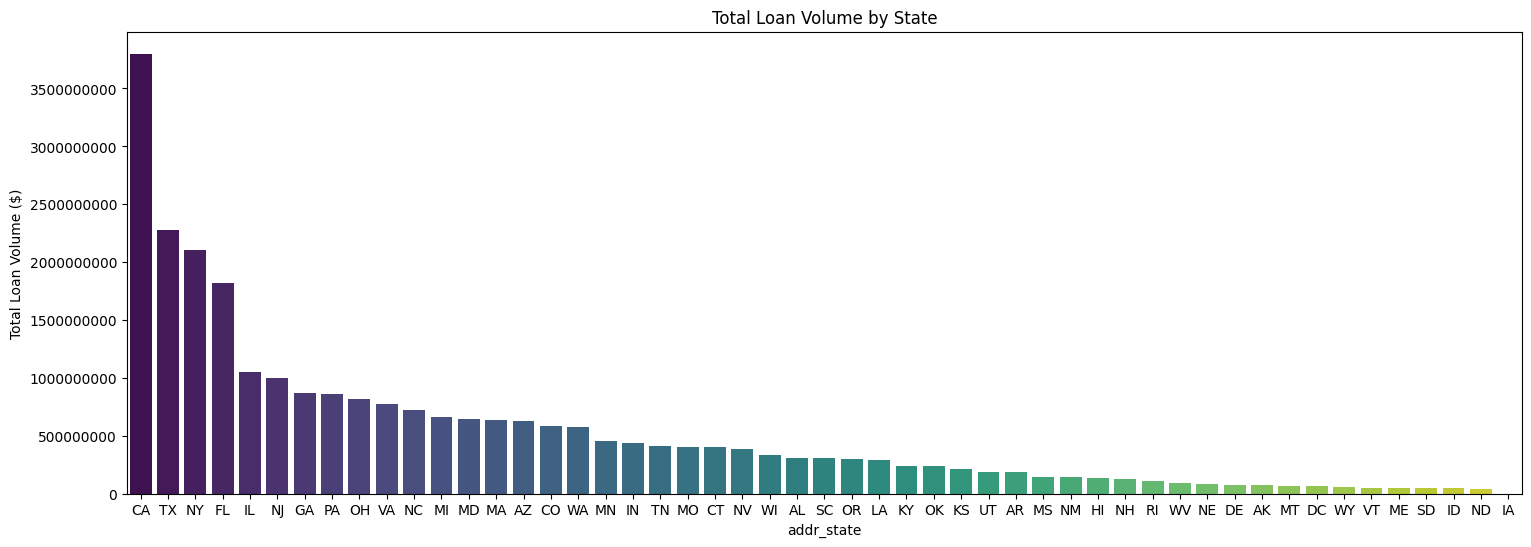

In [9]:
# Plot total 'loan_amnt' by 'addr_state'
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='addr_state', y='loan_amnt', hue='addr_state', data=pd.DataFrame(total_loan_amnt_by_state), palette='viridis')

# Add space to left most bar
#plt.xlim(-1, 7)

# Add more margin between each bar
plt.subplots_adjust(wspace=.75)

# Add labels to each bar, format y-axis in millions
#for container in ax.containers:
#    ax.bar_label(container, fmt='${:,.2f}')

plt.title('Total Loan Volume by State')
# Set y-label
plt.ylabel('Total Loan Volume ($)')

# Show y-axis in plain format (without scientific notation)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('./output/total_loan_vol_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

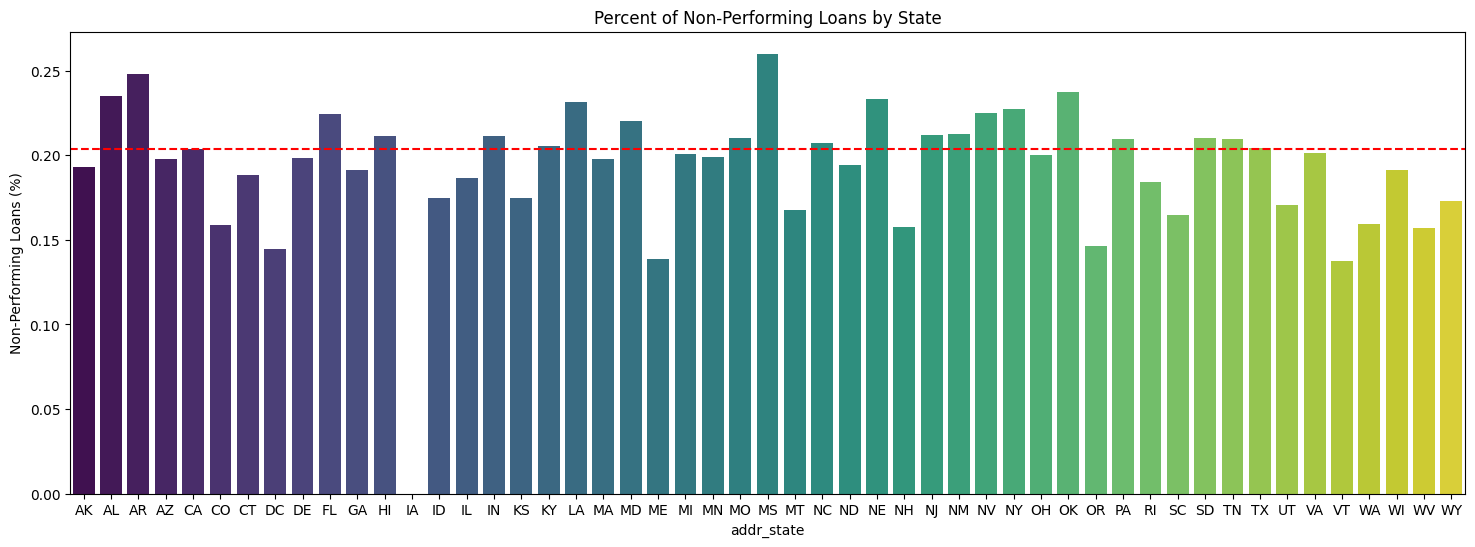

In [10]:
# Percent of Non-Performing loans by state
non_performing_loans_by_state = df.groupby('addr_state')['loan_status'].apply(lambda x: (x == 'Non-Performing').sum() / len(x))

# Plot percent of non-performing loans by state
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='addr_state', y='loan_status', hue='addr_state', data=pd.DataFrame(non_performing_loans_by_state), palette='viridis')
# Set y-label
plt.ylabel('Non-Performing Loans (%)')

# Add horizontal line to represent % of non-performing loans in the dataset
plt.axhline(y=(df['loan_status'] == 'Non-Performing').sum() / len(df), color='r', linestyle='--', label='Average Non-Performing Loans')
plt.title('Percent of Non-Performing Loans by State')
plt.savefig('./output/non_performing_loans_by_state.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
import geopandas as gpd
# Load U.S. states shapefile
shapefile_path = 'data/map/usa-states-census-2014.shp'
states = gpd.read_file(shapefile_path)
states.head()

# Merge dataframes
merged = states.set_index('STUSPS').join(non_performing_loans_by_state)

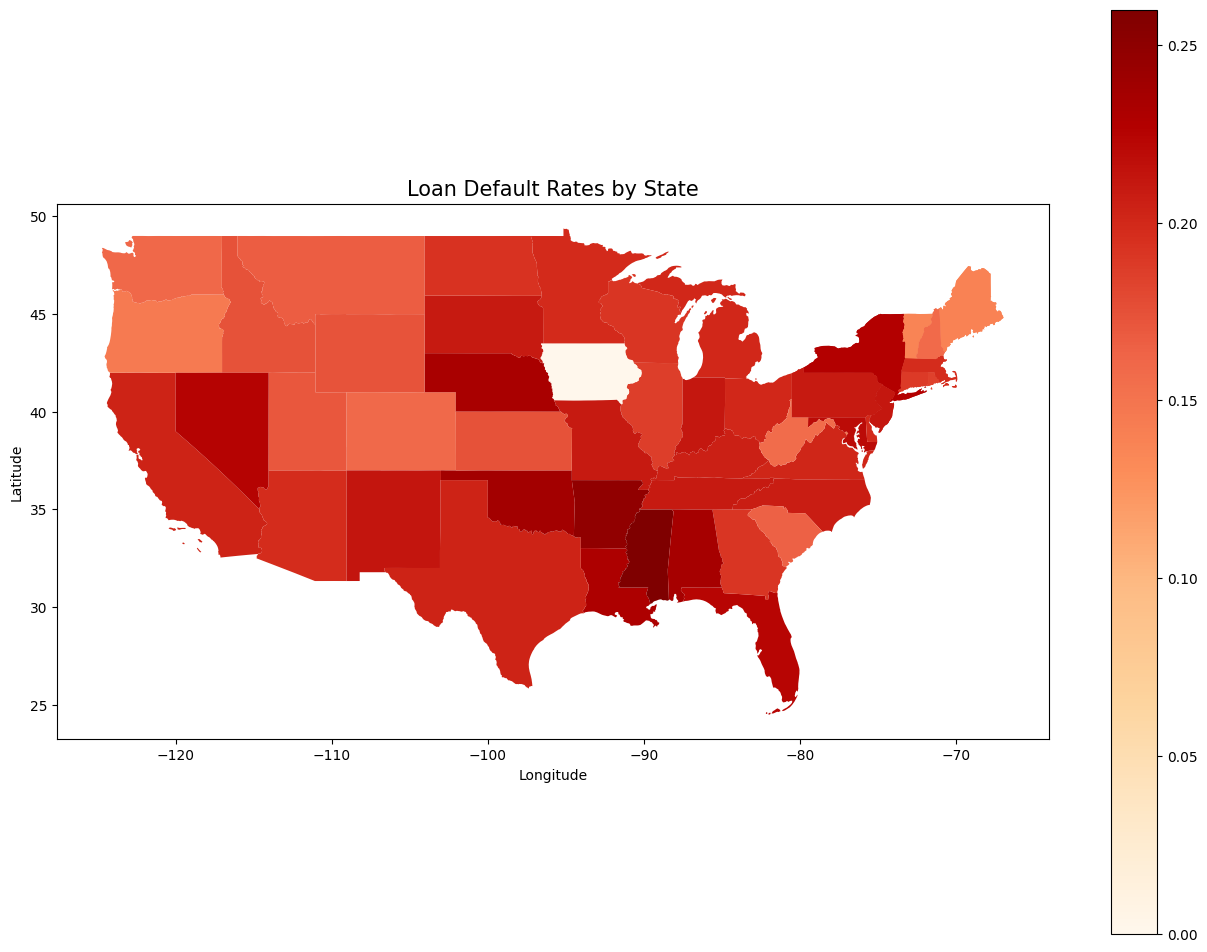

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
merged.plot(column='loan_status', cmap='OrRd', ax=ax, figsize=(15, 10), legend=True)
ax.set_title('Loan Default Rates by State', fontdict={'fontsize': '15', 'fontweight' : '3'})
# Set x-label
plt.xlabel('Longitude')
# Set y-label
plt.ylabel('Latitude')
plt.savefig('./output/non_performing_loans_by_state_on_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Loan Volume Amount by Purpose

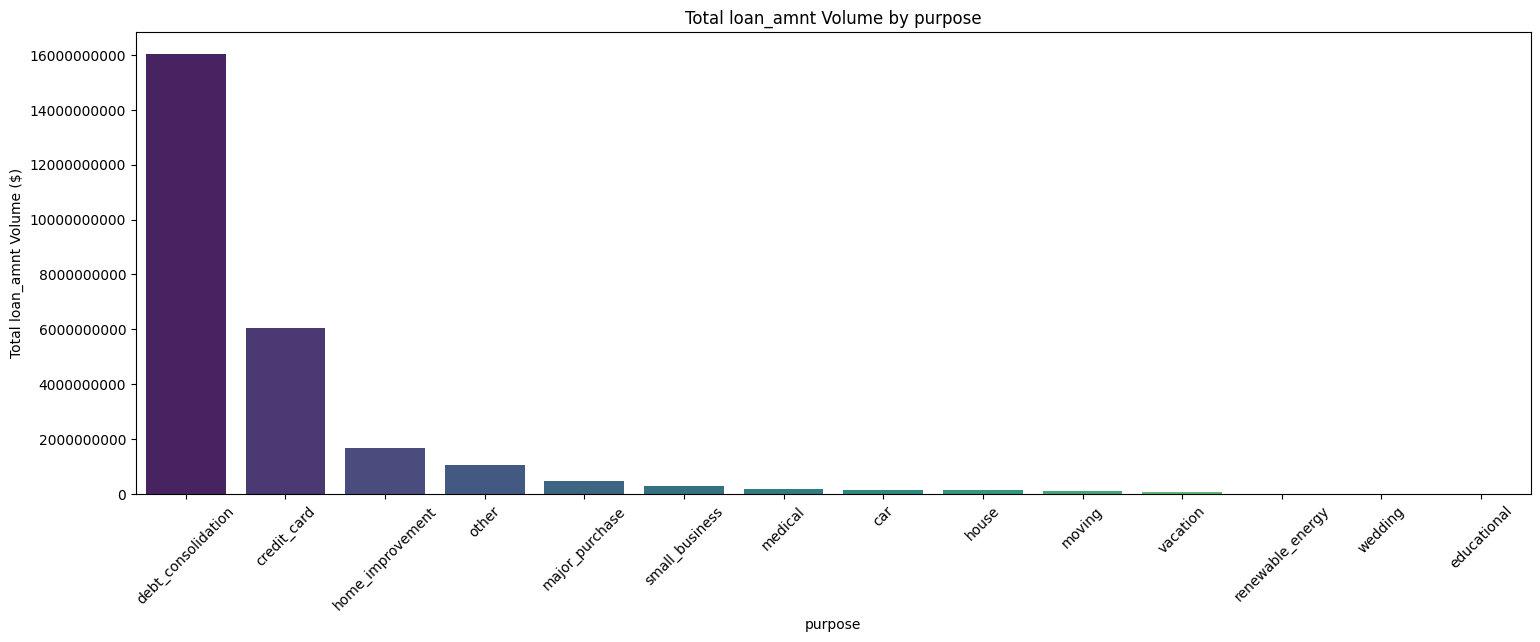

In [13]:
plot_Atotals_vs_B(df, 'loan_amnt', 'purpose', rotation=45)

### Employment Titles

Let's plot the wordcloud for employment titles

Number of unique values: 355970


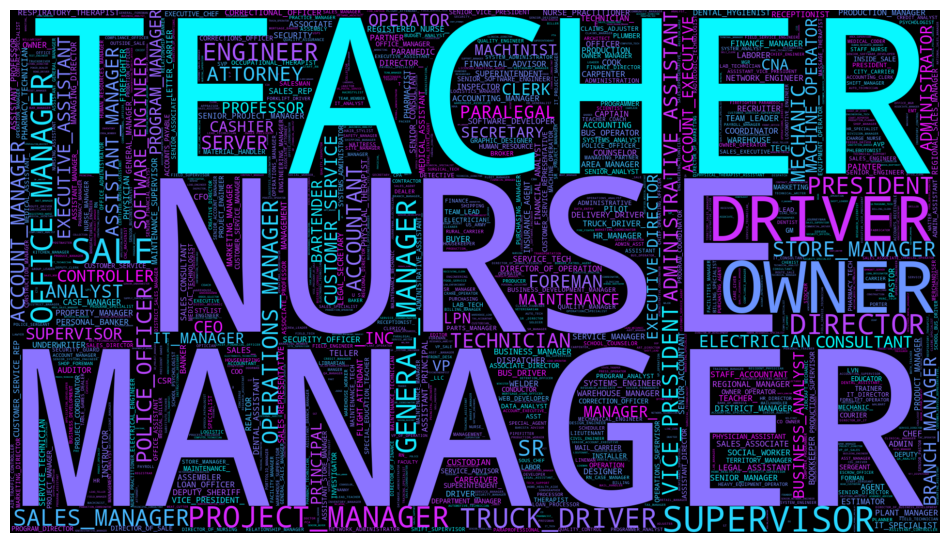

In [14]:
create_wordcloud(df['emp_title'])

#### Control the number of employee titles to work with

In [15]:
NUM_OF_TOP_EMP_TITLES = 20

In [16]:
top_emp_titles = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index
df_top_emp_titles = df[df['emp_title'].isin(top_emp_titles)]

In [17]:
df_top_emp_titles.sample(10)

,acc_now_delinq,addr_state,annual_inc,application_type,avg_cur_bal,bc_util,delinq_2yrs,dti,emp_length,emp_title,...,loan_amnt,loan_status,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,verification_status
667391,0.0,MO,35000.0,Individual,2099.0,79.6,0.0,22.77,9,SUPERVISOR,...,15000.0,Fully Paid,0.0,0.0,debt_consolidation,14480.0,0.796,B4,36,Source Verified
1268140,0.0,TN,58000.0,Individual,10812.0,80.3,1.0,26.73,10,SALES,...,10000.0,Fully Paid,1.0,1.0,debt_consolidation,12096.0,0.707,C4,36,Source Verified
468131,0.0,NY,200000.0,Individual,12510.0,43.7,4.0,12.68,10,NURSE,...,12000.0,Non-Performing,0.0,0.0,home_improvement,9719.0,0.498,D2,36,Source Verified
1019124,0.0,CA,90000.0,Individual,20113.0,50.1,0.0,18.01,7,VICE_PRESIDENT,...,14000.0,Fully Paid,0.0,0.0,credit_card,14369.0,0.555,A5,36,Not Verified
1675574,0.0,NC,85000.0,Individual,10165.0,36.6,0.0,9.81,10,OWNER,...,14000.0,Fully Paid,1.0,1.0,small_business,40660.0,0.366,B4,36,Source Verified
1235646,0.0,KS,42000.0,Individual,1774.0,104.7,0.0,6.26,3,TEACHER,...,7000.0,Fully Paid,0.0,0.0,debt_consolidation,5323.0,0.794,C5,36,Source Verified
1688319,0.0,TX,45600.0,Individual,3939.0,94.0,0.0,32.32,10,DRIVER,...,15000.0,Non-Performing,0.0,0.0,debt_consolidation,29548.0,0.510,A5,36,Verified
1311154,0.0,CA,155000.0,Individual,9583.0,73.4,2.0,12.51,1,OPERATIONS_MANAGER,...,35000.0,Fully Paid,0.0,0.0,debt_consolidation,22431.0,0.629,C3,36,Source Verified
757424,0.0,NC,94000.0,Individual,3505.0,83.2,0.0,19.44,5,GENERAL_MANAGER,...,10000.0,Fully Paid,0.0,0.0,debt_consolidation,22952.0,0.783,C1,36,Source Verified
1168497,0.0,NY,150800.0,Individual,3182.0,65.7,0.0,5.48,3,PROJECT_MANAGER,...,17000.0,Fully Paid,0.0,0.0,credit_card,19833.0,0.634,B2,36,Verified


In [18]:
df_top_emp_titles['emp_title'].value_counts()

emp_title
TEACHER               36462
NURSE                 36171
MANAGER               35176
OWNER                 23590
DRIVER                16865
SUPERVISOR            15189
SALES                 14539
OFFICE_MANAGER        10539
PROJECT_MANAGER       10517
GENERAL_MANAGER        9795
TRUCK_DRIVER           8899
DIRECTOR               7619
PRESIDENT              7056
ENGINEER               7027
SALES_MANAGER          6424
OPERATIONS_MANAGER     6107
POLICE_OFFICER         5642
STORE_MANAGER          5437
VICE_PRESIDENT         5352
ACCOUNTANT             5201
Name: count, dtype: int64

In [19]:
# Top 20 employment titles as a percentage of total records
print(f'Top 20 employment titles as a percentage of total records: {df_top_emp_titles["emp_title"].value_counts().sum()/len(df)*100}%')

Top 20 employment titles as a percentage of total records: 15.31210772821928%


In [20]:
# Compute and print the mean loan amount for each of the top employment titles
print(df_top_emp_titles.groupby('emp_title')['loan_amnt'].mean().sort_values(ascending=False))

# Print the mean loan amount for df_top_emp_titles
print(f'Mean loan amount for top {NUM_OF_TOP_EMP_TITLES} employment titles: {df_top_emp_titles["loan_amnt"].mean()}')

emp_title
VICE_PRESIDENT        21293.432362
PRESIDENT             20753.245465
DIRECTOR              19611.684604
SALES_MANAGER         17588.912671
ENGINEER              17197.964992
PROJECT_MANAGER       17183.605116
GENERAL_MANAGER       16886.860643
POLICE_OFFICER        16784.349521
OWNER                 16598.997457
OPERATIONS_MANAGER    16461.482725
NURSE                 16113.016643
MANAGER               15245.874318
STORE_MANAGER         14578.393415
ACCOUNTANT            14507.825418
SALES                 14482.894284
SUPERVISOR            14157.622292
TEACHER               14137.734491
TRUCK_DRIVER          14136.366446
DRIVER                13287.883190
OFFICE_MANAGER        13221.531929
Name: loan_amnt, dtype: float64
Mean loan amount for top 20 employment titles: 15645.629954642973


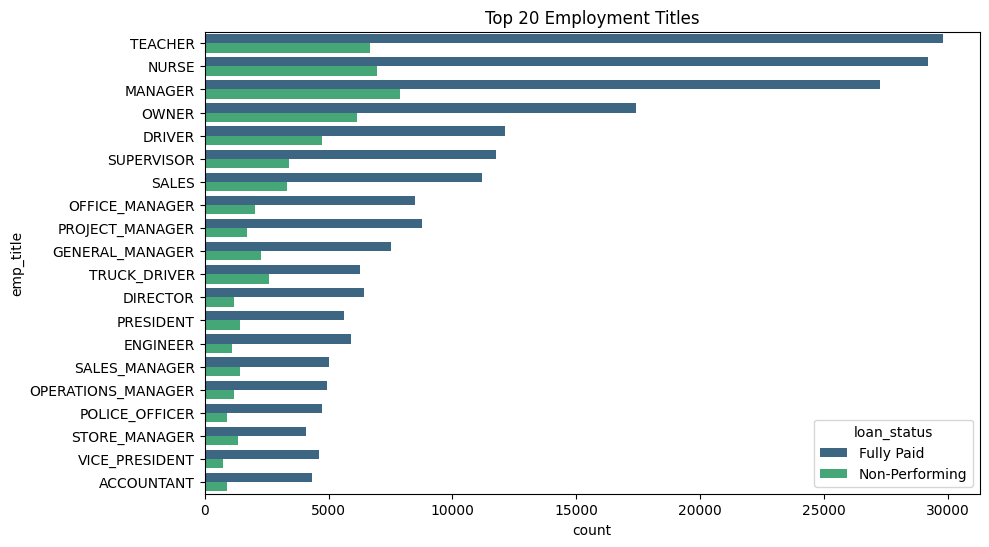

In [21]:
# Plot the top 'emp_title' values against loan_status
plt.figure(figsize=(10, 6))
#ax = sns.countplot(y='emp_title', data=df, order=df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')
ax = sns.countplot(y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')

#plt.xticks(rotation=90)
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


loan_status         Fully Paid  Non-Performing     ratio
emp_title                                               
ACCOUNTANT            0.830225        0.169775  0.204493
DIRECTOR              0.845518        0.154482  0.182707
DRIVER                0.718292        0.281708  0.392191
ENGINEER              0.840899        0.159101  0.189203
GENERAL_MANAGER       0.766207        0.233793  0.305130
MANAGER               0.775330        0.224670  0.289774
NURSE                 0.807664        0.192336  0.238139
OFFICE_MANAGER        0.805295        0.194705  0.241782
OPERATIONS_MANAGER    0.806943        0.193057  0.239245
OWNER                 0.738872        0.261128  0.353414
POLICE_OFFICER        0.840659        0.159341  0.189542
PRESIDENT             0.799036        0.200964  0.251508
PROJECT_MANAGER       0.836075        0.163925  0.196065
SALES                 0.771442        0.228558  0.296273
SALES_MANAGER         0.780199        0.219801  0.281724
STORE_MANAGER         0.750230 

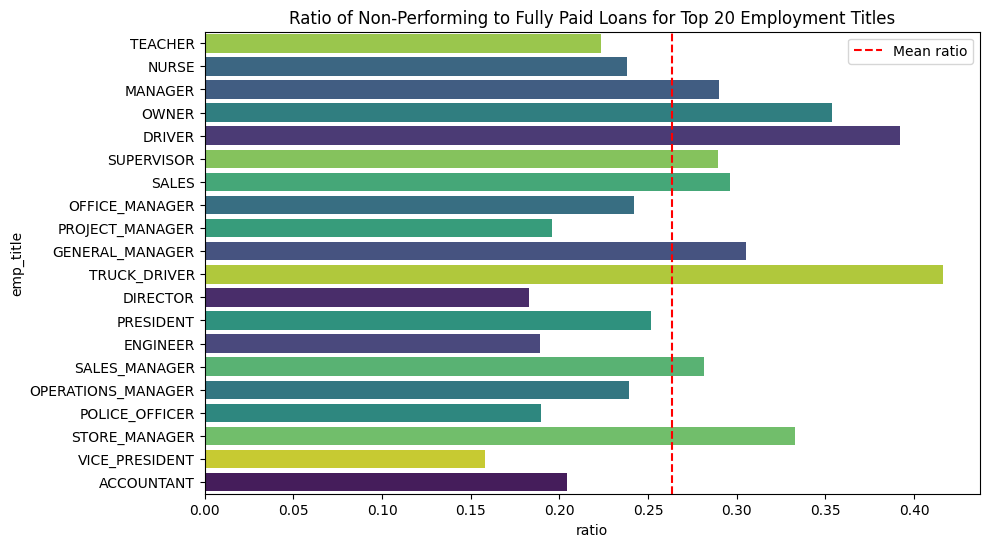

In [22]:
# Get the top 'emp_title' values, then compute the ratio of Non-Current loans to Current loans
#top_emp_title = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index

#emp_title_ratio = df[df['emp_title'].isin(top_emp_title)].groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio = df_top_emp_titles.groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio['ratio'] = emp_title_ratio['Non-Performing'] / emp_title_ratio['Fully Paid']
print(emp_title_ratio)

mean_ratio = emp_title_ratio['ratio'].mean()
print(f"Mean ratio: {mean_ratio}")

# Plot the ratio of Non-Current loans to Current loans for the top 10 'emp_title' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='ratio', 
    y=emp_title_ratio.index,
    hue=emp_title_ratio.index,
    data=emp_title_ratio,
    order=df_top_emp_titles['emp_title'].value_counts().index,
    palette='viridis')

# Add the mean ratio to the plot
plt.axvline(mean_ratio, color='red', linestyle='--', label='Mean ratio')
plt.legend()

plt.title('Ratio of Non-Performing to Fully Paid Loans for Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


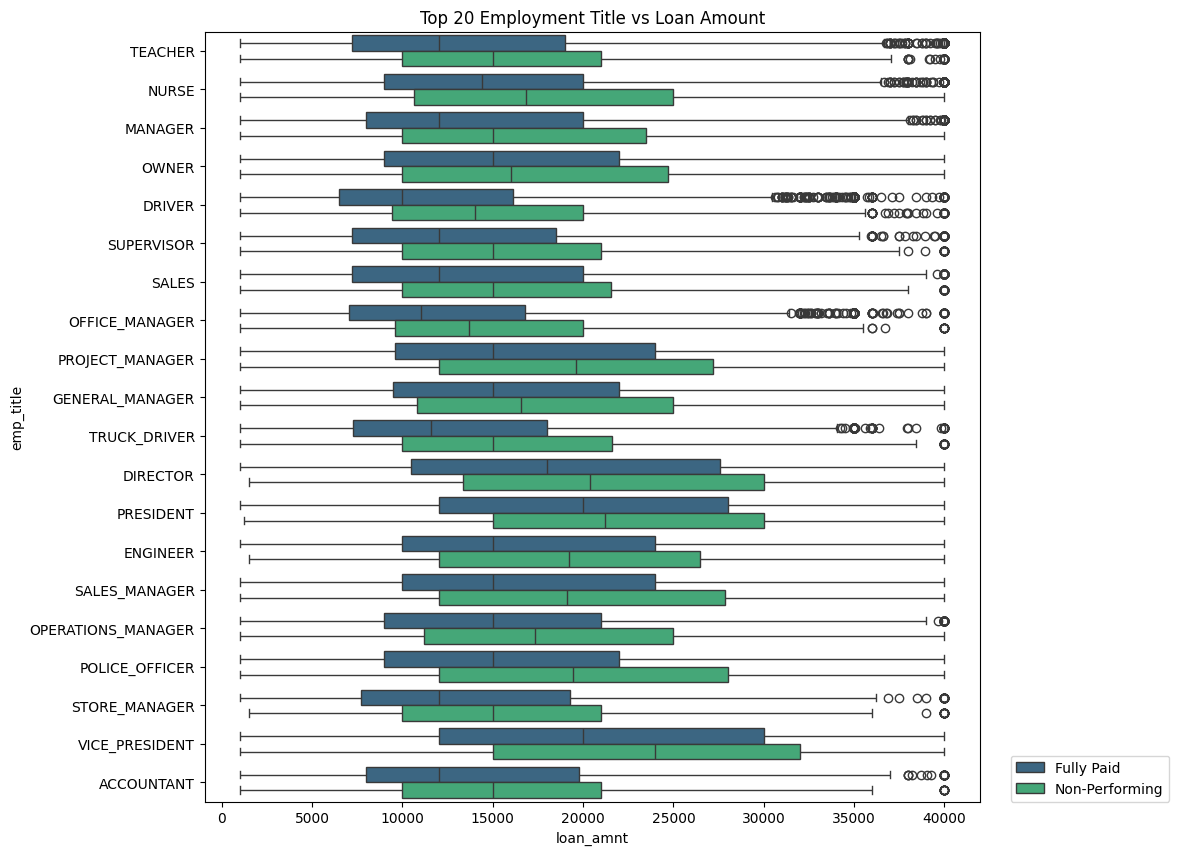

In [23]:
# Plot disitribution of top 'emp_title' against loan_amount
plt.figure(figsize=(10, 10))
sns.boxplot(x='loan_amnt', y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, hue='loan_status', palette='viridis')
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Title vs Loan Amount')
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_amnt.png', dpi=300, bbox_inches='tight')
plt.show()


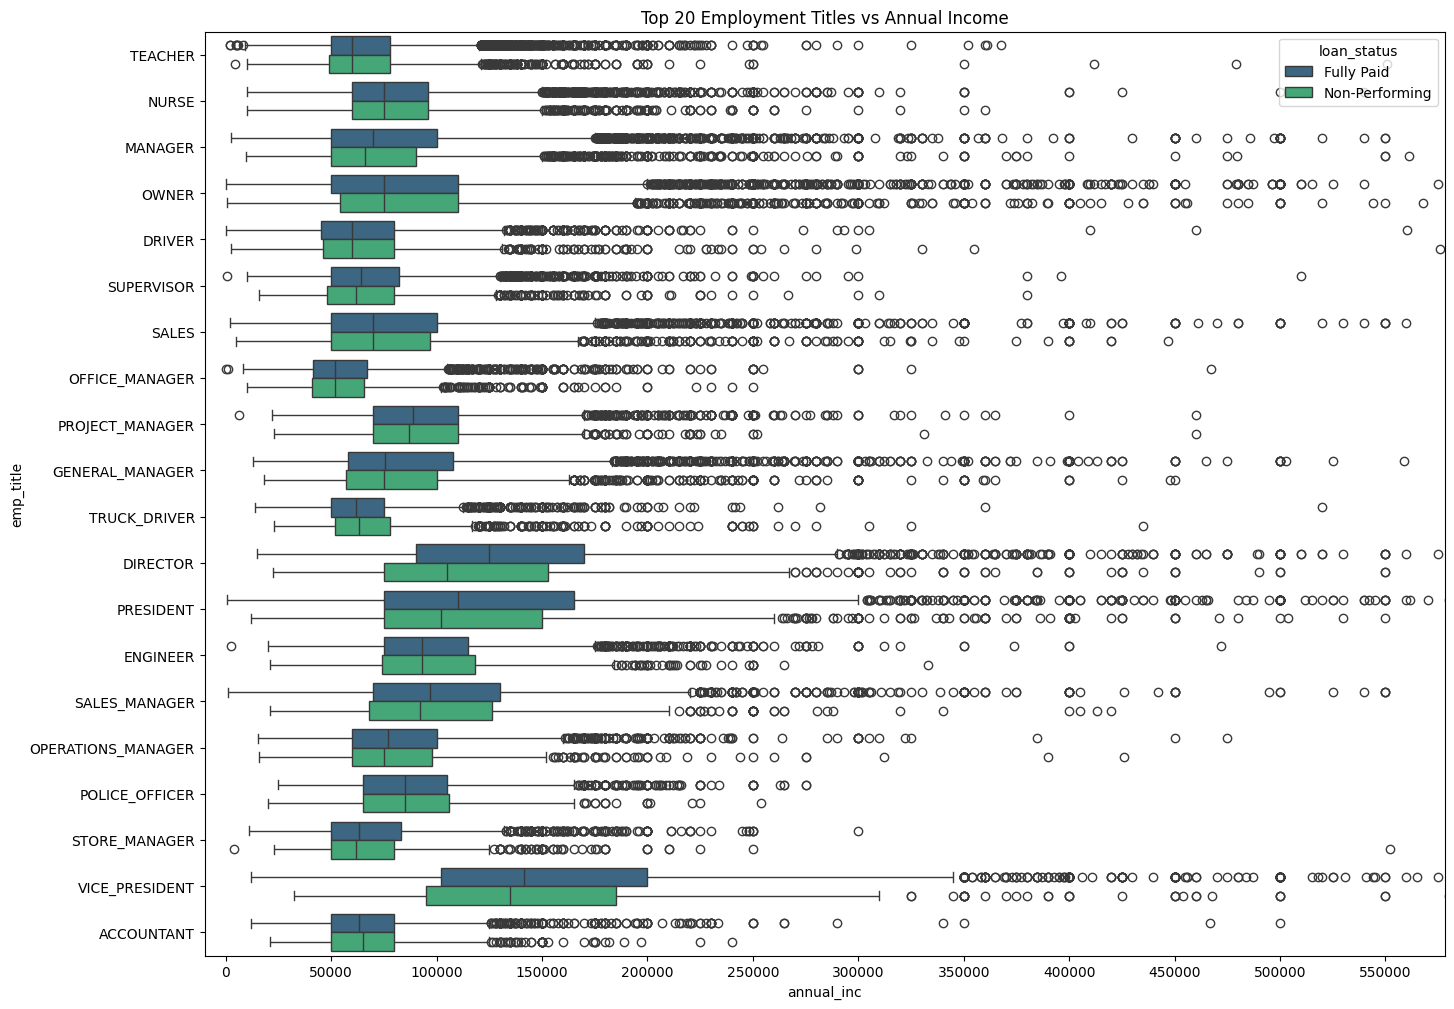

In [24]:
# Plot disitribution of top 'emp_title' against annual_inc
plt.figure(figsize=(16, 12))
sns.boxplot(x='annual_inc', y='emp_title', hue='loan_status', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, palette='viridis')
# Set the x-axis limit to $578,126 (starting for 37% tax bracket), adding padding to the left
plt.xlim(-10000, 578126)
plt.xticks(np.arange(0, 600000, 50000))

#plt.subplots_adjust(right=2)

plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles vs Annual Income')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_annual_inc2.png', dpi=300, bbox_inches='tight')
plt.show()

### Loan Grade

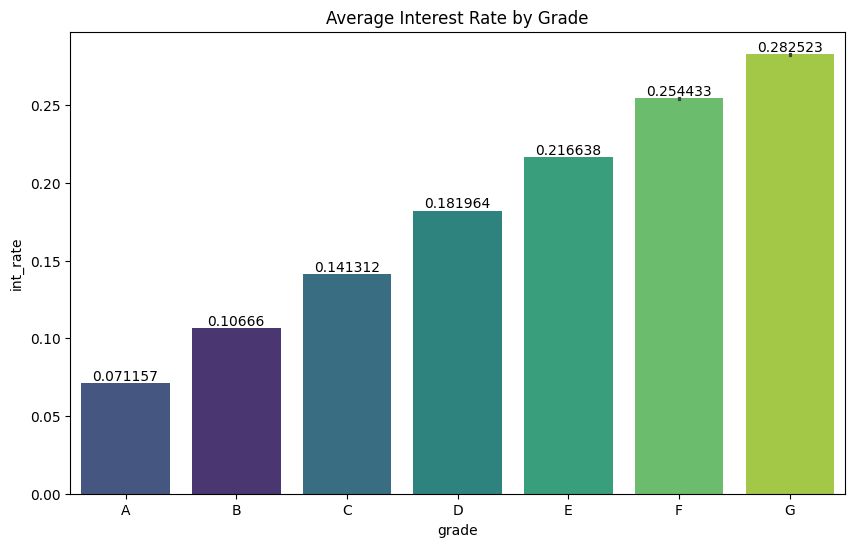

In [25]:
# Plot average interest rate by grade
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='grade', y='int_rate', hue='grade', data=df, estimator='mean', order=sorted(df['grade'].unique()), palette='viridis')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Interest Rate by Grade')
plt.savefig('./output/avg_int_rate_by_grade.png', dpi=300, bbox_inches='tight')
plt.show()


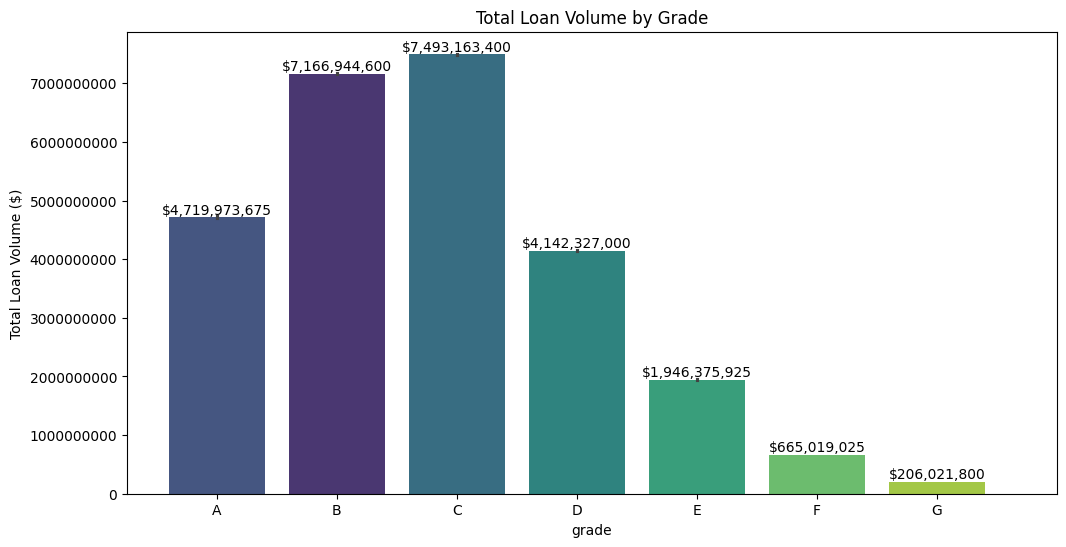

In [26]:
# Plot total 'loan_amnt' by grade
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='grade', y='loan_amnt', hue='grade', data=df, estimator='sum', order=sorted(df['grade'].unique()), palette='viridis')

# Add space to left most bar
plt.xlim(-0.75, 7)

# Add more margin between each bar
plt.subplots_adjust(wspace=.75)

# Add labels to each bar, format y-axis in millions
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')
plt.title('Total Loan Volume by Grade')
# Set y-label
plt.ylabel('Total Loan Volume ($)')

# Show y-axis in plain format (without scientific notation)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('./output/total_loan_vol_by_grade.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Engineering

### FICO scores

In [27]:
# Create a new column 'fico_avg' that averages 'fico_range_low' and 'fico_range_high'
df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2
df['fico_avg'].unique()

array([722. , 757. , 732. , 707. , 672. , 762. , 662. , 747. , 717. ,
       667. , 692. , 677. , 687. , 702. , 712. , 697. , 682. , 787. ,
       727. , 752. , 802. , 777. , 767. , 742. , 737. , 792. , 772. ,
       782. , 797. , 807. , 812. , 817. , 832. , 822. , 842. , 847.5,
       827. , 837. ])

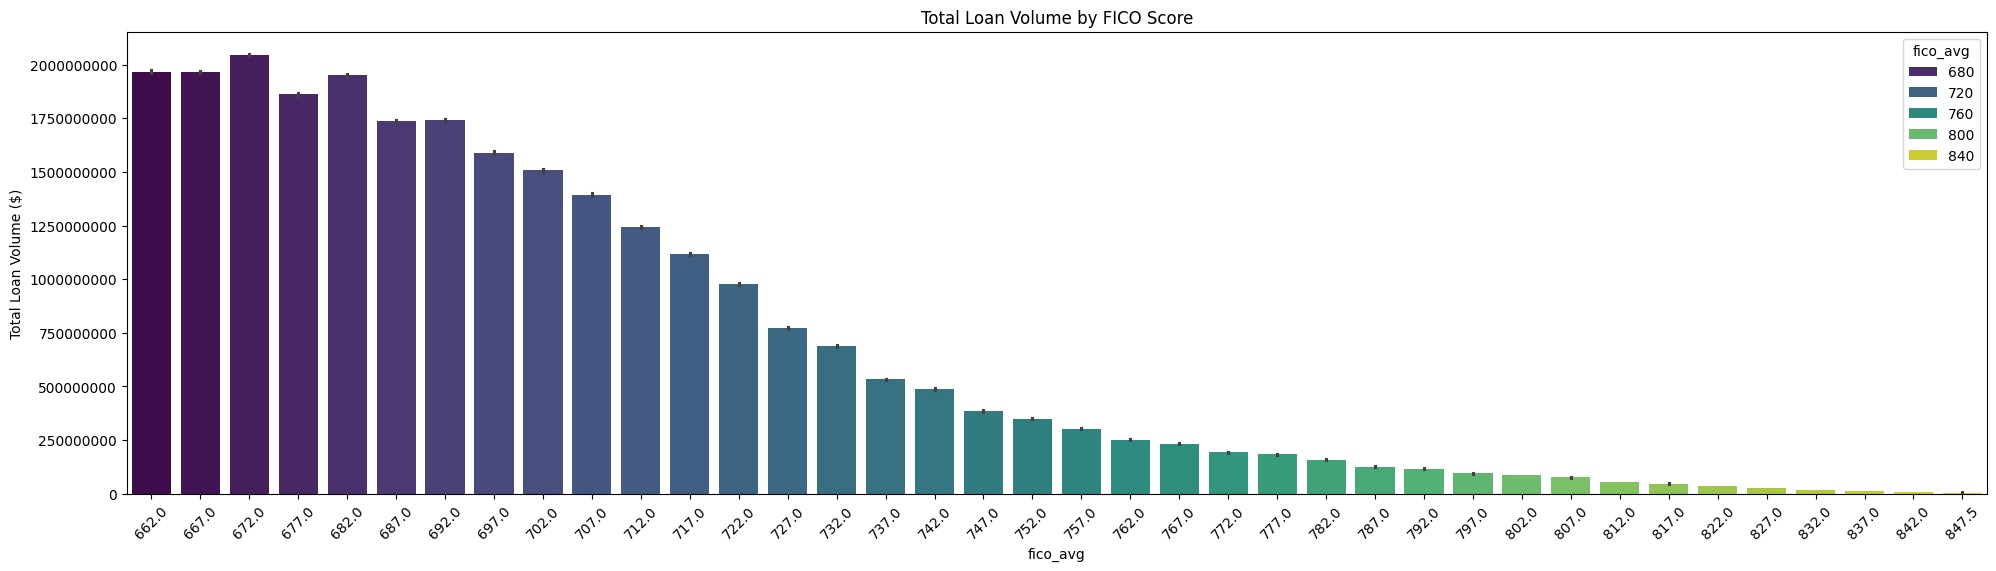

In [28]:
# Plot 'average 'fico_avg' by 'loan'
plt.figure(figsize=(24, 6))
ax = sns.barplot(x='fico_avg', y='loan_amnt', hue='fico_avg', data=df, estimator='sum', order=sorted(df['fico_avg'].unique()), palette='viridis')

# Add space to left most bar
#plt.xlim(-0.5, 7)

# Add more margin between each bar
plt.subplots_adjust(wspace=.75)

# Add labels to each bar, format y-axis in millions
#for container in ax.containers:
#    ax.bar_label(container, fmt='${:,.0f}')

# Set x-ticks staggered
plt.xticks(rotation=45)

plt.title('Total Loan Volume by FICO Score')
# Set y-label
plt.ylabel('Total Loan Volume ($)')

# Show y-axis in plain format (without scientific notation)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('./output/total_loan_vol_by_fico.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Total 'loan_amnt' by 'fico_avg'
total_loan_amnt_by_fico = df.groupby('fico_avg')['loan_amnt'].sum().sort_values(ascending=False)

# Add a column for % of total loan amount by fico_avg
total_loan_amnt_by_fico = pd.DataFrame(total_loan_amnt_by_fico)
total_loan_amnt_by_fico['% of Total Loan Amount'] = (total_loan_amnt_by_fico['loan_amnt'] / total_loan_amnt_by_fico['loan_amnt'].sum()) * 100
total_loan_amnt_by_fico.head()

,loan_amnt,% of Total Loan Amount
fico_avg,,
672.0,2.045055e+09,7.764119
662.0,1.967902e+09,7.471203
667.0,1.965649e+09,7.462649
682.0,1.950585e+09,7.405460
677.0,1.861591e+09,7.067590


In [30]:
# Compute loan repayment rate by 'fico_avg'
fico_avg_repayment_rate = df.groupby('fico_avg')['loan_status'].value_counts(normalize=True).unstack()
fico_avg_repayment_rate['repayment_rate'] = fico_avg_repayment_rate['Fully Paid'] / (fico_avg_repayment_rate['Fully Paid'] + fico_avg_repayment_rate['Non-Performing']) * 100
fico_avg_repayment_rate.head(5)

loan_status,Fully Paid,Non-Performing,repayment_rate
fico_avg,,,
662.0,0.735263,0.264737,73.526323
667.0,0.745514,0.254486,74.551405
672.0,0.754971,0.245029,75.497070
677.0,0.760896,0.239104,76.089596
682.0,0.766766,0.233234,76.676633


In [31]:
# Compute loan default rate by 'fico_avg'
fico_avg_loan_status = df.groupby('fico_avg')['loan_status'].value_counts(normalize=True).unstack()
fico_avg_loan_status['default_rate'] = fico_avg_loan_status['Non-Performing'] / fico_avg_loan_status['Fully Paid']
fico_avg_loan_status.head(5)


loan_status,Fully Paid,Non-Performing,default_rate
fico_avg,,,
662.0,0.735263,0.264737,0.360057
667.0,0.745514,0.254486,0.341356
672.0,0.754971,0.245029,0.324555
677.0,0.760896,0.239104,0.314240
682.0,0.766766,0.233234,0.304178


In [32]:
# Compute average int_rate by 'fico_avg'
fico_avg_int_rate = df.groupby('fico_avg')['int_rate'].mean()

# Convert to DataFrame
fico_avg_int_rate = pd.DataFrame(fico_avg_int_rate)
fico_avg_int_rate['int_rate'] = fico_avg_int_rate['int_rate'].round(4)*100
fico_avg_int_rate.head(5)


,int_rate
fico_avg,
662.0,15.37
667.0,15.17
672.0,14.92
677.0,14.73
682.0,14.25


In [33]:
fico_avg_profit = pd.concat([fico_avg_repayment_rate['repayment_rate'], fico_avg_int_rate], axis=1)
fico_avg_profit.head(5)


,repayment_rate,int_rate
fico_avg,,
662.0,73.526323,15.37
667.0,74.551405,15.17
672.0,75.497070,14.92
677.0,76.089596,14.73
682.0,76.676633,14.25


In [34]:
# Join 'fico_avg_profit' with 'total_loan_amnt_by_fico' by 'fico_avg'
fico_avg_profit = pd.concat([fico_avg_profit, total_loan_amnt_by_fico], axis=1)
fico_avg_profit.head(5)

,repayment_rate,int_rate,loan_amnt,% of Total Loan Amount
fico_avg,,,,
662.0,73.526323,15.37,1.967902e+09,7.471203
667.0,74.551405,15.17,1.965649e+09,7.462649
672.0,75.497070,14.92,2.045055e+09,7.764119
677.0,76.089596,14.73,1.861591e+09,7.067590
682.0,76.676633,14.25,1.950585e+09,7.405460


In [35]:
# Compute the profit for each FICO score
fico_avg_profit['profit'] = fico_avg_profit['loan_amnt'] * fico_avg_profit['repayment_rate'] / 100 * fico_avg_profit['int_rate'] / 100
fico_avg_profit.head(5)

,repayment_rate,int_rate,loan_amnt,% of Total Loan Amount,profit
fico_avg,,,,,
662.0,73.526323,15.37,1.967902e+09,7.471203,2.223925e+08
667.0,74.551405,15.17,1.965649e+09,7.462649,2.223040e+08
672.0,75.497070,14.92,2.045055e+09,7.764119,2.303584e+08
677.0,76.089596,14.73,1.861591e+09,7.067590,2.086471e+08
682.0,76.676633,14.25,1.950585e+09,7.405460,2.131292e+08


/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_85560/2530143668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fico_avg_profit.index, y='profit', data=fico_avg_profit, palette='viridis')


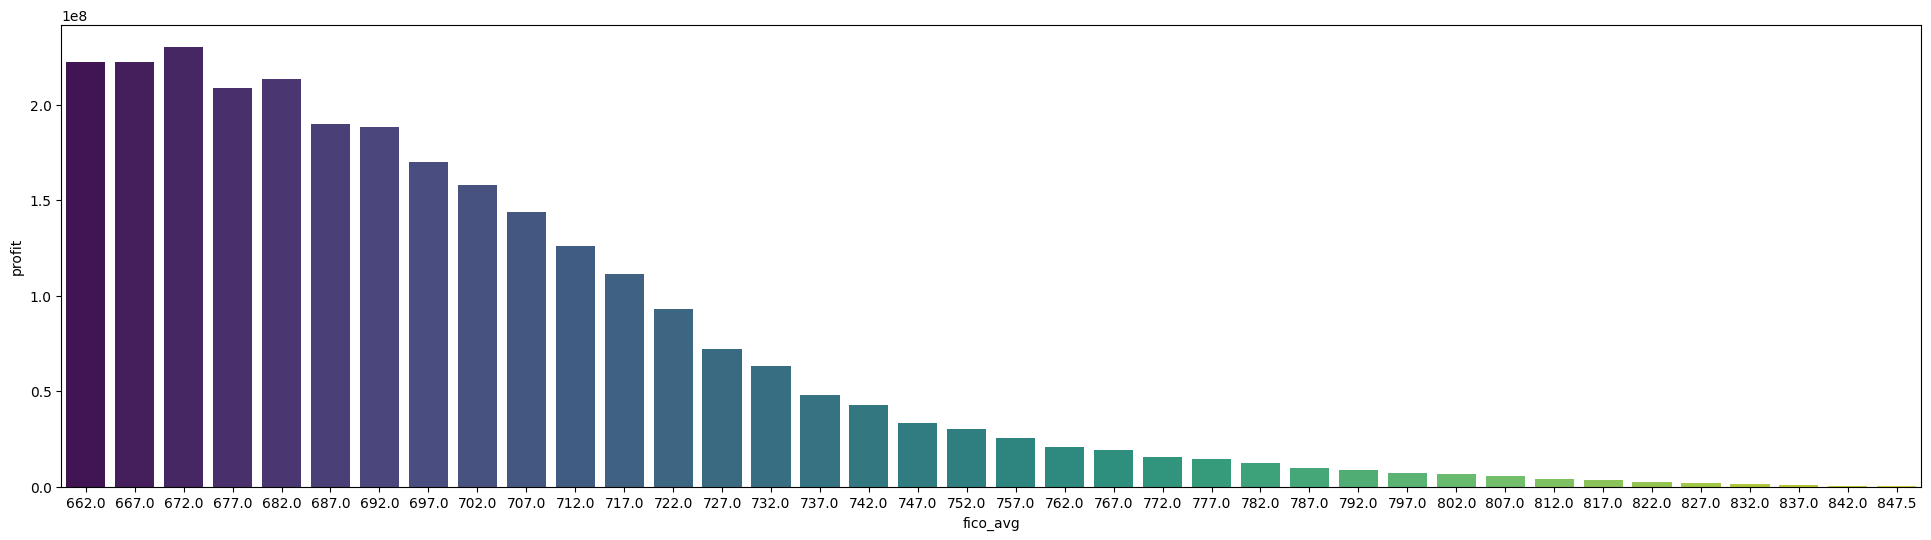

In [36]:
# Plot 'profit' by 'fico_avg'
plt.figure(figsize=(24, 6))
ax = sns.barplot(x=fico_avg_profit.index, y='profit', data=fico_avg_profit, palette='viridis')


In [37]:
fico_avg_profit['profit'].idxmax()

672.0

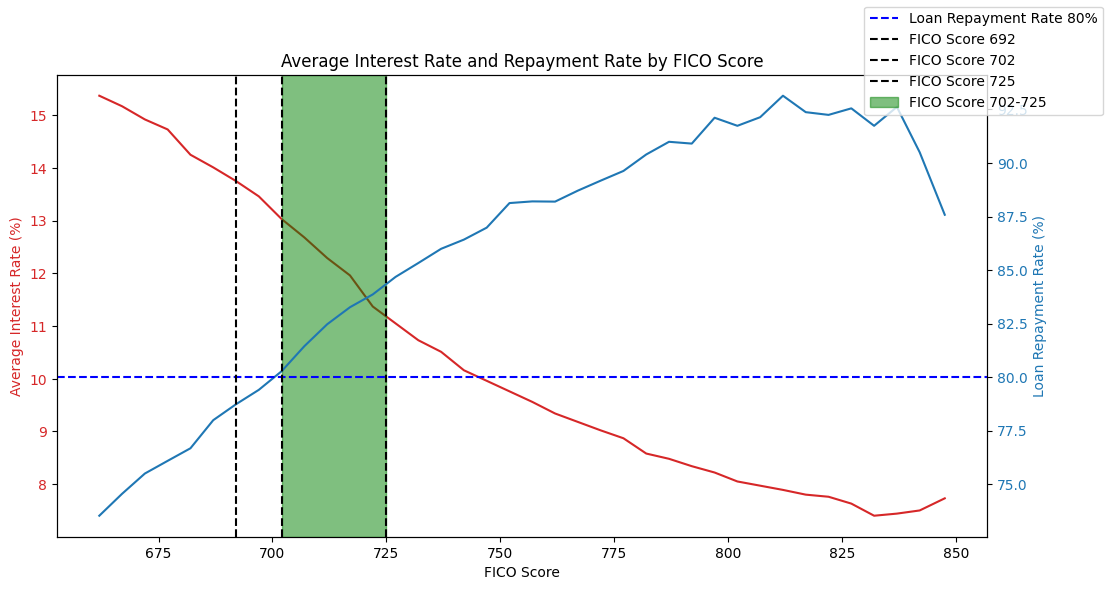

In [38]:
sns.set_palette('viridis')

# Plot 'fico_avg_int_rate' and 'fico_avg_repayment_rate' on the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'fico_avg_int_rate' on the left y-axis
color = 'tab:red'
ax1.set_xlabel('FICO Score')
ax1.set_ylabel('Average Interest Rate (%)', color=color)
ax1.plot(fico_avg_int_rate, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'fico_avg_repayment_rate'
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Loan Repayment Rate (%)', color=color)
ax2.plot(fico_avg_repayment_rate['repayment_rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.axhline(80, color='blue', linestyle='--', label='Loan Repayment Rate 80%')
ax2.axvline(692, color='black', linestyle='--', label='FICO Score 692')
ax2.axvline(702, color='black', linestyle='--', label='FICO Score 702')
ax2.axvline(725, color='black', linestyle='--', label='FICO Score 725')

# Shade area between FICO Score 702 and 725
plt.axvspan(702, 725, color='green', alpha=0.5, label='FICO Score 702-725')

# Add legend
fig.legend(loc='upper right')

# Add title
plt.title('Average Interest Rate and Repayment Rate by FICO Score')
plt.savefig('./output/avg_int_rate_and_repayment_rate_by_fico.png', dpi=300, bbox_inches='tight')
plt.show()



In [39]:
skip_plot_features = [
    'acc_now_delinq',
    'emp_title',
    'sub_grade',
    'fico_range_high',
    'fico_range_low',
    'inq_last_6mths',
    'int_rate',
    'issue_d', 
    'revol_util'
]

Number of features to plot: 21
Skipping acc_now_delinq
Skipping emp_title
Skipping fico_range_high
Skipping fico_range_low
Skipping inq_last_6mths
Skipping int_rate
Skipping issue_d
Skipping revol_util
Skipping sub_grade


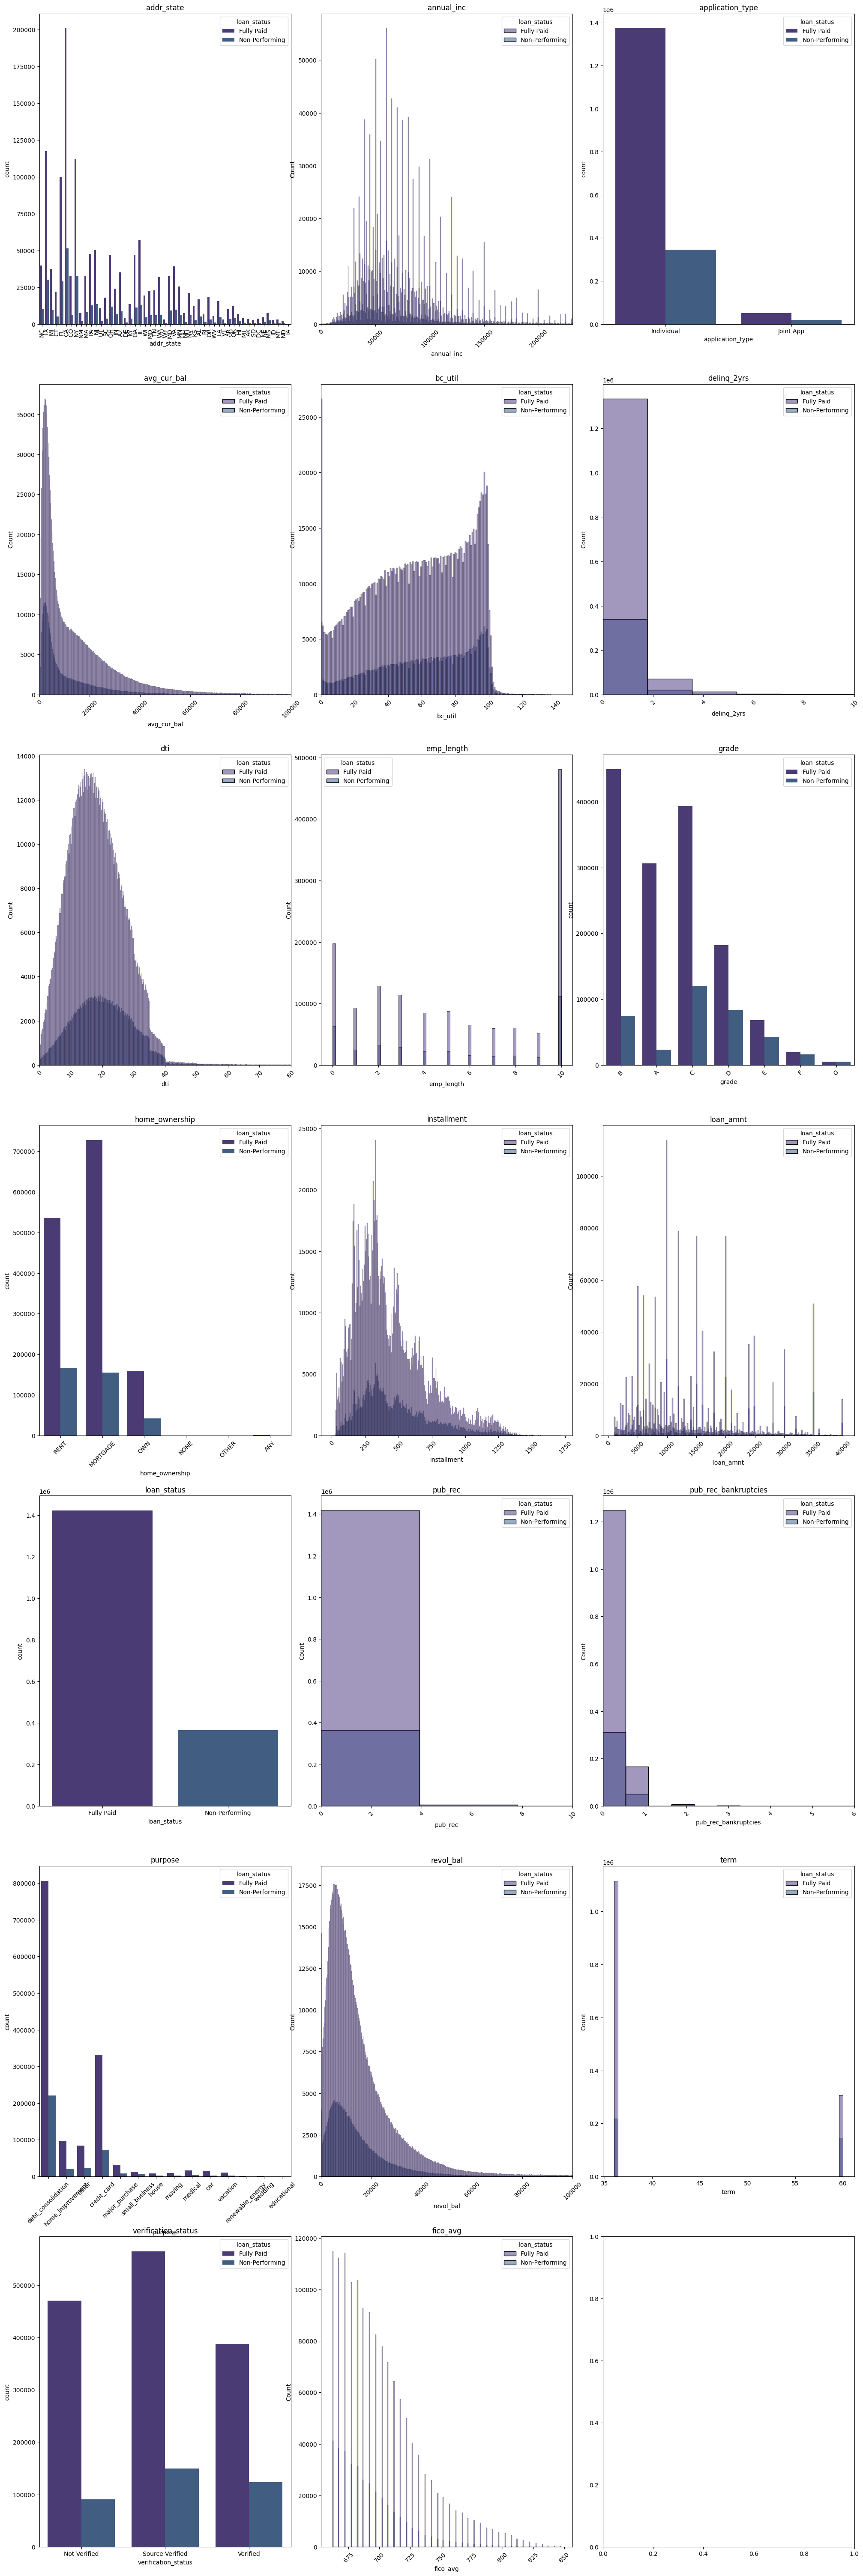

In [40]:
# Number of columns we will be plotting
n_cols = df.shape[1] - len(skip_plot_features) + 1
print(f'Number of features to plot: {n_cols}')

# Create a grid of subplots with size (20, 60).  Grid should have 3 columns and the number of rows should be calculated based on the number of columns in the dataframe
plt.subplots(n_cols//3, 3,figsize=(20,60))

# Add margins between each subplot
plt.tight_layout(pad=2.0, h_pad=8.0, w_pad=2.0)

col_idx = 0

# Loop through each column in the dataframe
for col in df.columns:

    if col in skip_plot_features:
        print(f'Skipping {col}')
        continue

    # Plot in the ith position
    plt.subplot(n_cols//3, 3,col_idx+1)

    # if col is numeric
    if df[col].dtype in ['int64', 'float64']:
        if col == 'annual_inc':
            # Set the x-axis limit to $231,250 (35% tax bracket)
            plt.xlim(0, 231250)
        if col == 'avg_cur_bal':
            # Set the x-axis limit to $100,000
            plt.xlim(0, 100000)
        if col == 'bc_util':
            # Set the x-axis limit to 150%
            plt.xlim(0, 150)
        if col == 'delinq_2yrs':
            plt.xlim(0, 10)
        if col == 'dti':
            # Set the x-axis limit to 80%
            plt.xlim(0, 80)
        # if col has 'last_fico' in its name
        if 'last_fico' in col:
            # Set the x-axis limit to 850
            plt.xlim(475, 850)
        if col == 'pub_rec':
            plt.xlim(0, 10)
        if col == 'pub_rec_bankruptcies':
            plt.xlim(0, 6)
        if col == 'revol_bal':
            plt.xlim(0, 100000)
        sns.histplot(x=df[col], hue=df['loan_status'])

    else:

        sns.countplot(x=col, hue='loan_status', data=df)
    
    # if col has more than 4 unique values
    if len(df[col].unique()) > 4:
        if col == 'addr_state':
            # Rotate the xticks
            plt.xticks(rotation=90)
        else:
            # Rotate the xticks
            plt.xticks(rotation=45)
        
    # Add a title to the plot
    plt.title(col)
    col_idx += 1

plt.savefig('./output/eda.png', dpi=300, bbox_inches='tight')
plt.show()

## Encode non-numerical features
https://www.blog.trainindata.com/target-encoder-a-powerful-categorical-encoding-method/

In [41]:
# Binary encode 'application_type'
df['application_type'] = df['application_type'].astype(str).replace(
    {
        'Individual': 1,
        'Joint App': 0
    }
).infer_objects(copy=False)

# Rename 'application_type' to 'individual_application'
df.rename(columns={'application_type': 'individual_application'}, inplace=True)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_85560/4238591896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['application_type'] = df['application_type'].astype(str).replace(


### Encode loan `grade` and `sub_grade`

In [42]:
# Encode 'grade' to ordinal values
df['grade'] = df['grade'].astype(str).replace(
    {
        'A': 0,
        'B': 1,
        'C': 2,
        'D': 3,
        'E': 4,
        'F': 5,
        'G': 6
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_85560/258190725.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'] = df['grade'].astype(str).replace(


In [43]:
df['sub_grade'] = df['sub_grade'].astype(str).replace(
    {
        'A1': 0,
        'A2': 1,
        'A3': 2,
        'A4': 3,
        'A5': 4,
        'B1': 5,
        'B2': 6,
        'B3': 7,
        'B4': 8,
        'B5': 9,
        'C1': 10,
        'C2': 11,
        'C3': 12,
        'C4': 13,
        'C5': 14,
        'D1': 15,
        'D2': 16,
        'D3': 17,
        'D4': 18,
        'D5': 19,
        'E1': 20,
        'E2': 21,
        'E3': 22,
        'E4': 23,
        'E5': 24,
        'F1': 25,
        'F2': 26,
        'F3': 27,
        'F4': 28,
        'F5': 29,
        'G1': 30,
        'G2': 31,
        'G3': 32,
        'G4': 33,
        'G5': 34
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_85560/2556157886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sub_grade'] = df['sub_grade'].astype(str).replace(


### Encode `verification_status`

In [44]:
# Encode 'verification_status' to ordinal values
df['verification_status'] = df['verification_status'].astype(str).replace(
    {
        'Not Verified': 0,
        'Source Verified': 1,
        'Verified': 2
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_85560/3755547314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status'] = df['verification_status'].astype(str).replace(


### Encode `loan_status`

In [45]:
# Binary encode 'loan_status'
df['fully_paid'] = df['loan_status'].astype(str).replace(
    {
        'Fully Paid': 1,
        'Non-Performing': 0
    }
).infer_objects(copy=False).astype(int)


/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_85560/1662674139.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fully_paid'] = df['loan_status'].astype(str).replace(


### Compute correlation matrix and identify multicollinearity

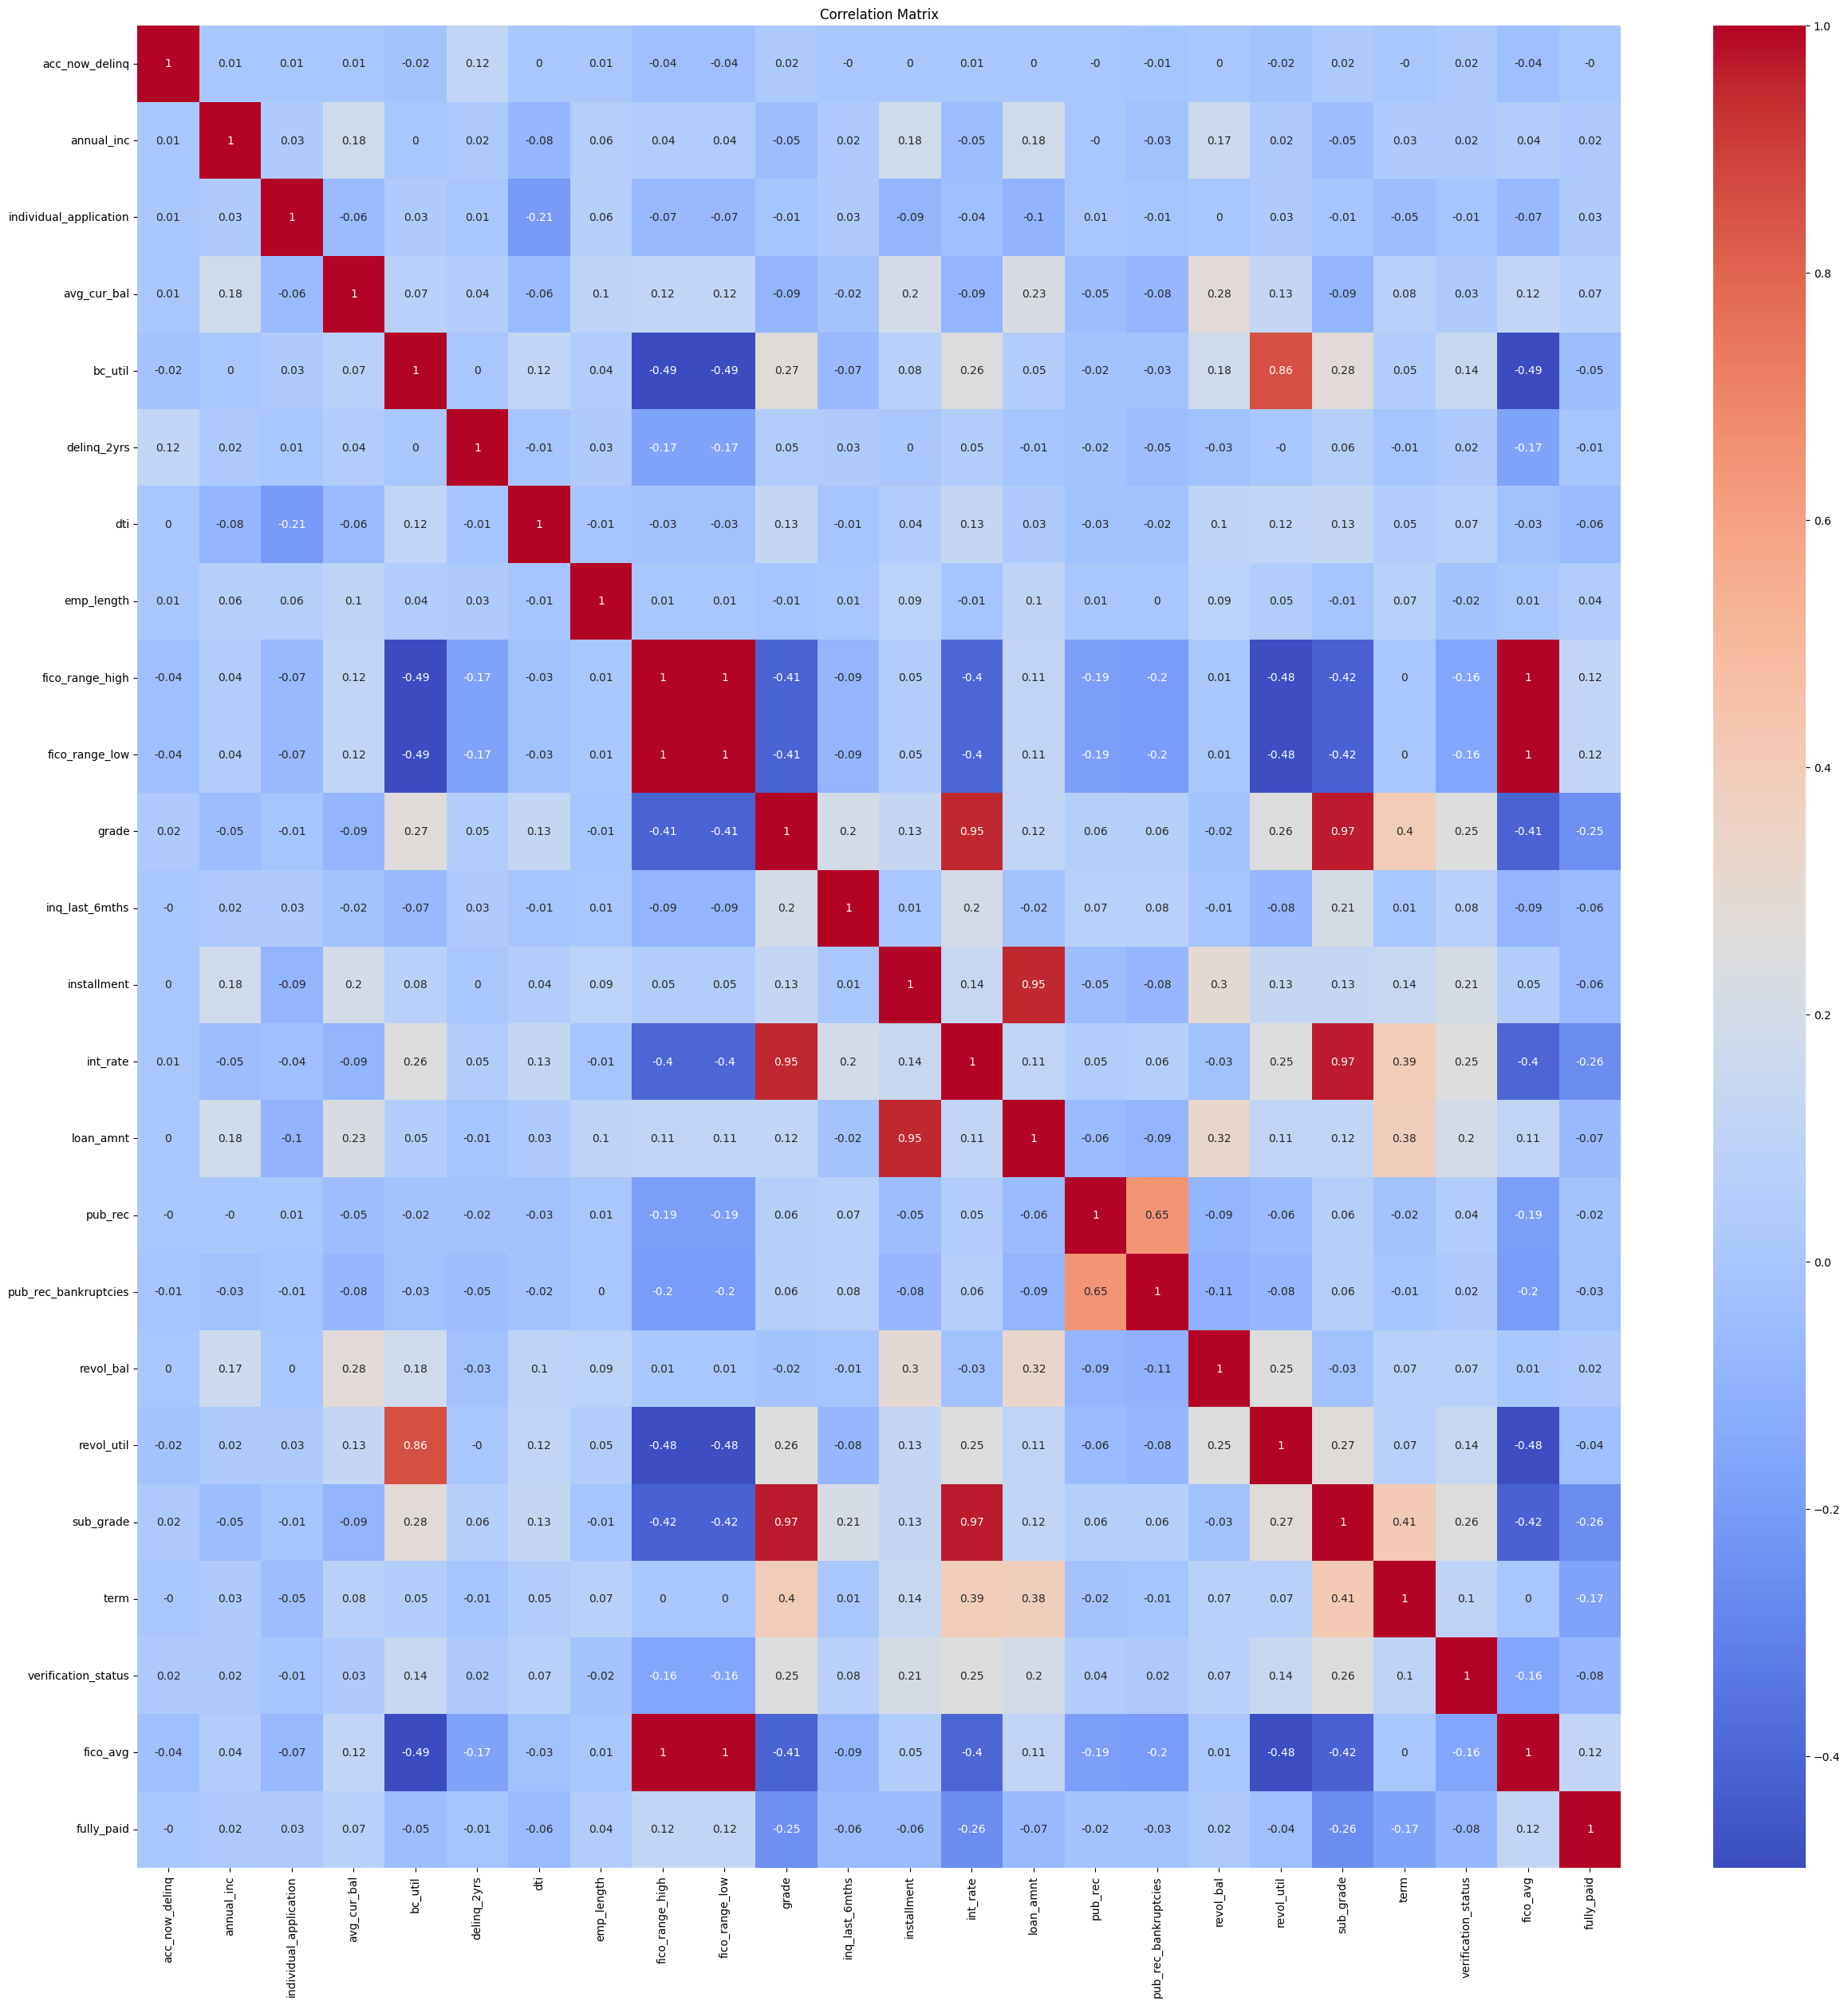

In [46]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute the correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Use only 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# Plot the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('./output/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

Notice the highly correlated features:
* `revol_util` and **`bc_util`**
* `grade`, **`sub_grade`**, and `int_rate`
* `fico_range_high`, `fico_range_low`, and **`fico_range_avg`**
* `installment` and **`loan_amnt`**

We will keep the features in **bold** and drop the rest.

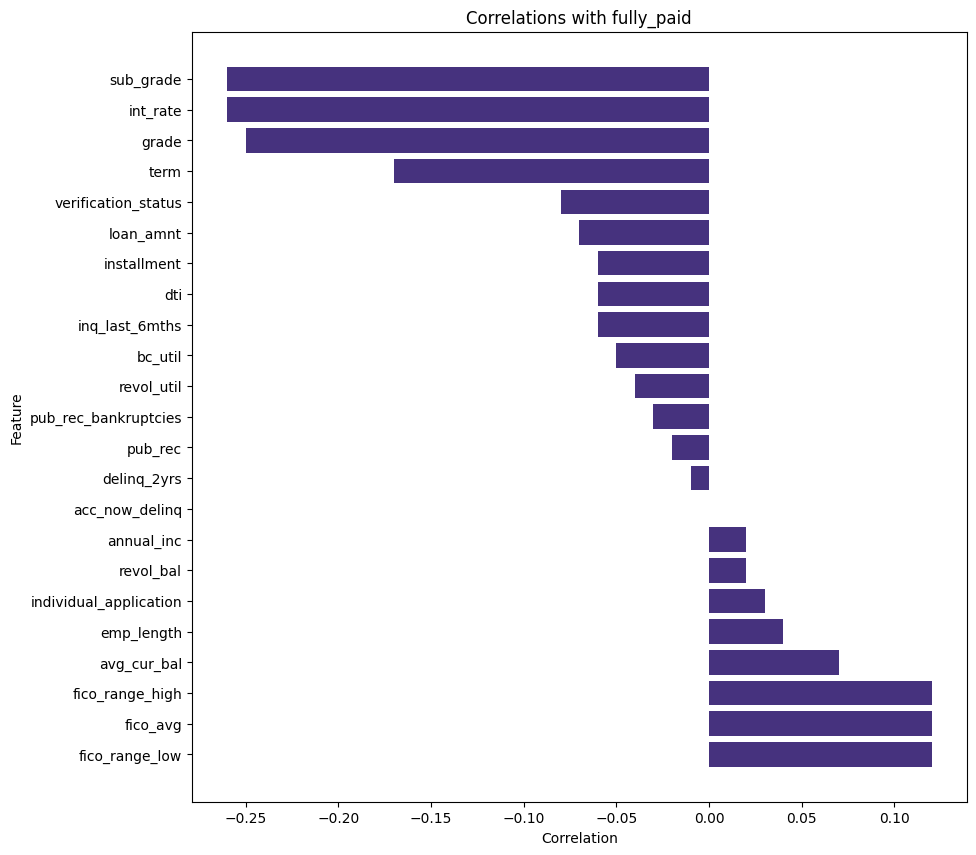

In [47]:
# List all correlations with the target column
correlations = correlation_matrix['fully_paid'].sort_values(ascending=False)

# Remove 'fully_paid' from the a series
correlations = correlations.drop('fully_paid')

# Plot all correlations with the target column
plt.figure(figsize=(10, 10))
plt.barh(correlations.index, correlations)

plt.xlabel('Correlation')
plt.ylabel('Feature')

plt.title('Correlations with fully_paid')
plt.savefig('./output/correlations_with_fully_paid.png', dpi=300, bbox_inches='tight')
plt.show()

### One-hot encode

In [48]:
# One hot encode 'home_ownership'
df = pd.get_dummies(df, columns=['home_ownership'])


In [49]:
# One hot encode 'purpose'
df = pd.get_dummies(df, columns=['purpose'])


In [50]:
df['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid        0.796257
Non-Performing    0.203743
Name: proportion, dtype: float64

### Clean-up

In [51]:
# Drop features no longer needed after EDA
df.drop(['issue_d', 'addr_state', 'emp_title', 'fico_range_low', 'fico_range_high'], axis=1, inplace=True)

# Drop highly correlated features
df.drop(['grade', 'int_rate', 'revol_util', 'installment'], axis=1, inplace=True)

# Drop 'loan_status' column
df.drop('loan_status', axis=1, inplace=True)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786867 entries, 0 to 1786866
Data columns (total 38 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   acc_now_delinq              float64
 1   annual_inc                  float64
 2   individual_application      int64  
 3   avg_cur_bal                 float64
 4   bc_util                     float64
 5   delinq_2yrs                 float64
 6   dti                         float64
 7   emp_length                  int64  
 8   inq_last_6mths              float64
 9   loan_amnt                   float64
 10  pub_rec                     float64
 11  pub_rec_bankruptcies        float64
 12  revol_bal                   float64
 13  sub_grade                   int64  
 14  term                        int64  
 15  verification_status         int64  
 16  fico_avg                    float64
 17  fully_paid                  int64  
 18  home_ownership_ANY          bool   
 19  home_ownership_MORTGA

## Save engineered data to disk

In [53]:
# Save the cleaned data to a new csv file
df.to_csv('./output/engineered_full_loan_data.csv', index=False)

## Sample a small percentage for model training
Local training of ML models on the full dataset would be beyond what most laptops can handle.  To make sure the training completes in a reasonable amount of time, we will be working with only 10% of the data.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('fully_paid', axis=1), 
    df['fully_paid'], 
    test_size=0.1, 
    stratify=df['fully_paid']
)

# Merge X_test and y_test
testset = pd.concat([X_test, y_test], axis=1)

# Save the test set to a new csv file
testset.to_csv('./output/engineered_sample_loan_data.csv', index=False)
